# linear model 
y = w0*x0 + w1*x1 + ... + wn*xn + b

linear regression looks for optimizing w and b such as that it minimizeds the cot function :

sum(yi - yi)^2 = sum(yi - sum(wj*xij)^2

after evaluation, we can see if the model sufferes from : 
- over-fitting (many features)
- under-fitting (few features)

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression 

## Ridge  regression

* ridge regression puts constraint on the coefficients (w)
* the penalty term lambda regularizes the coefficients such that if the coefficients take large values the optimization function is penalized.
* ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.
* lambda -> 0 => the cost function resembles the one in simple lin reg

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import matplotlib 
matplotlib.rcParams.update({'font.size':12})


In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

In [9]:
boston = load_boston()
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [13]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
y= df['price']
X = df.drop('price',axis=1)

In [16]:
X_train,X_test,y_train, y_test = train_test_split(X,y,
                                                  test_size=.3,
                                                  random_state=3)

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)
train_score,test_score

(0.7419034960343789, 0.7147895265576849)

In [21]:
rr = Ridge(alpha=0.01)
rr.fit(X_train,y_train)
rr_train_score = rr.score(X_train,y_train)
rr_test_score = rr.score(X_test,y_test)
rr_train_score,rr_test_score

(0.7419030253527293, 0.7146125373123909)

In [22]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train,y_train)
rr100_train_score = rr100.score(X_train,y_train)
rr100_test_score = rr100.score(X_test,y_test)
rr100_train_score,rr100_test_score

(0.7172809669938278, 0.6805765856921933)

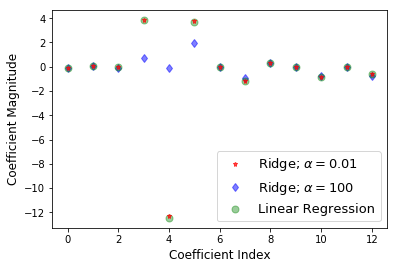

In [25]:
plt.plot(rr.coef_,
        alpha=.7,
        linestyle='none',
        marker='*',
         markersize=5,
         color='red',
         label=r'Ridge; $\alpha = 0.01$',
         zorder=7
        )

plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
         
plt.xlabel('Coefficient Index',fontsize=12)
plt.ylabel('Coefficient Magnitude',fontsize=12)
plt.legend(fontsize=13,loc=4)

For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression

For higher value of α (100), we see that for coefficient indices 3,4,5 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.

## Lasso regression

- like ridge cost function, lambda -> 0 => semilar to lr 
- instead of taking the squares of the coefs, the magnitudes are taken into account.
- this type of regularization (L1) can lead to zero coefs (as a result some of the features are completely negleted for the evalution of output)

=> lasso reg not only helps in reducing over-fitting but it can help us in feature selection

In [28]:
import math 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [27]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [30]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, 
                 columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
X = cancer.data
Y = cancer.target 

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)


In [40]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train,y_train)
test_score = lasso.score(X_test, y_test)
print(train_score,test_score)
coeff_used = np.sum(lasso.coef_!=0)
print(coeff_used)

0.6832133784853487 0.636446266236206
11


In [35]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

train_score = lasso001.score(X_train,y_train)
test_score = lasso001.score(X_test, y_test)
print(train_score,test_score)
coeff_used = np.sum(lasso001.coef_!=0)
print(coeff_used)

0.7414845253242521 0.7096270988778383
13


In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print( "LR training score:", lr_train_score )
print("LR ttest score: ", lr_test_score)

LR training score: 0.7419034960343789
LR ttest score:  0.7147895265576849


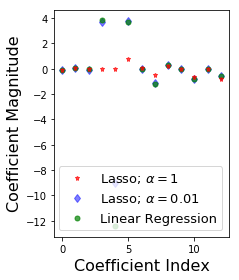

In [39]:
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

why the Lasso regression can result in feature selection and Ridge regression only reduces the coefficients close to zero, but not zero

ref: 
    https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b